# Marketing Assistant for Banking Product

* The problem statement

The data is related with direct marketing campaigns of a banking institution. 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.  

The marketing team needs to know which type of customers would be more willing to purchase the product and provides the dataset which requires manipulation in order to predict which type of customers would be most willing to get the product. 

The success rate (11%) was low it was established there was a need to predict the best method to reach customers and the best customers to reach.

* Give a short description of the project

This project intends to predict the type of customers who would be willing to subscribe to the product (bank term deposit) 

### Data Dictionary

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")


#### related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)


#### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


#### Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

#import other libraries....
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Data Inspection


In [2]:
# load the data

# the semi-colon is specified in separator because the data file uses semi-colons for delimiters

data = pd.read_csv('bank.csv', sep=';', header= 0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
pwd()

'C:\\Users\\PC\\Documents\\Project'

In [4]:
#Presents the data structure of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#describes the dataset

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
#Provides the number of rows and columns

data.shape

(4521, 17)

In [7]:
# Gets the age values and counts by categories

data.age.value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [8]:
#check the unique count of those who took up the product and those who did not

data.y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [9]:
#checks for NaN values, if true then there are NaN values

data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

From the data inspection above, the following can be deduced: 

- There are 4521 rows and 17 columns

- There are no null values in the dataset

- Because the dataset is a csv file, the columns are seen as objects, which needs to be changed

- In the y column, 88% of called customers didn't take the product while 11% of the called customers took on the product

- Majority of reached customers are in their early to mid thirties and less elderly clients were reached

In [14]:
#inspect the data

data.shape

(4520, 17)

In [17]:
#check for null values again

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
# To check for unique job types which would be used for the analysis

data['job'].unique()

array(['services', 'management', 'blue-collar', 'self-employed',
       'technician', 'entrepreneur', 'admin.', 'student', 'housemaid',
       'retired', 'unemployed', 'unknown'], dtype=object)

In [19]:
# To check the outcome of the phone call

data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
# To check the outcome of the phone call

data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

After cleaning the data, further inspection was done and the following was deduced: 

- Some customers are already given more piority than the others with the amount of phone calls they recieved 

- Some customers have a balance far higher than the average 

- The minimum customer age was 19 and the highest was 87

# Data Visualization

visualizing relationships in the data set.


Text(0, 0.5, 'Count phone call')

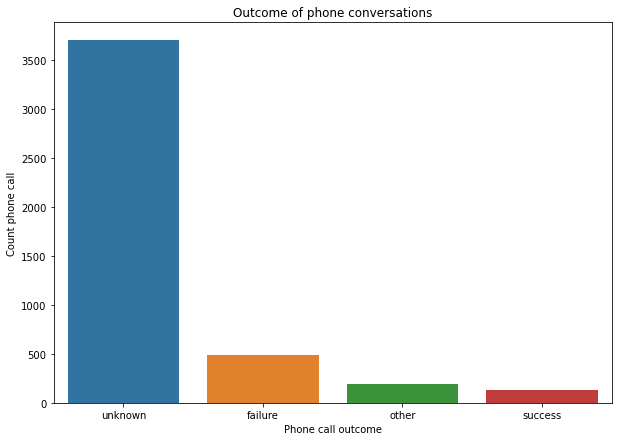

In [10]:
# data visualization

plt.figure(figsize=(10,7))
plt.title('Outcome of phone conversations')
sns.countplot(x='poutcome', data=data)

plt.xlabel('Phone call outcome')
plt.ylabel('Count phone call')

The chart above shows that majority of customers who took on the product have secondary institution as their highest educational qualification

## Bivariate Analysis


<AxesSubplot:xlabel='job'>

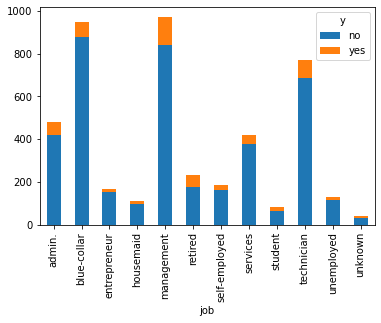

In [11]:
# data visualization

y = pd.crosstab(data.job,data.y)
y.plot.bar(stacked=True)


Majority of subscriptions came from those who are retired or have blue-collar jobs, or with jobs in management, admin and technicians while the least of subscriptions came from unemployed and unknown jobs

<AxesSubplot:xlabel='loan'>

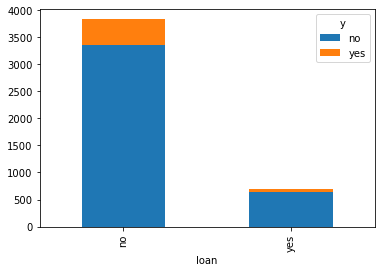

In [12]:
# data visualization

y = pd.crosstab(data.loan,data.y)
y.plot.bar(stacked=True)

Majority of those who subscribed didn't have an inplace loan.

<AxesSubplot:ylabel='age'>

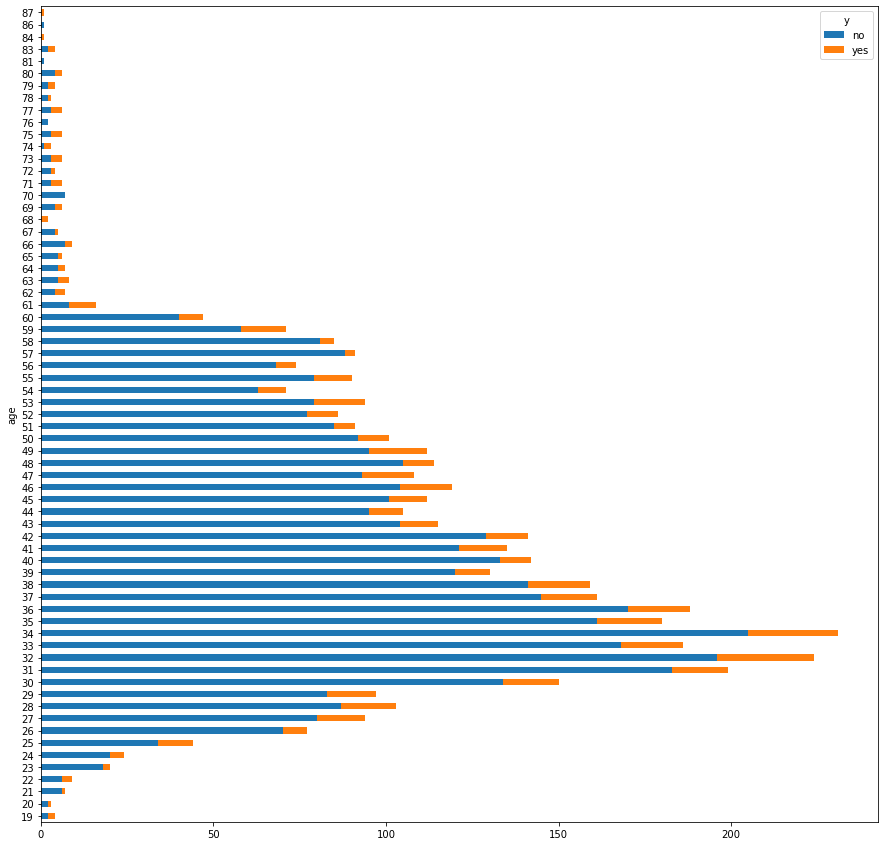

In [13]:
# Data visualization

y = pd.crosstab(data.age,data.y)
y.plot.barh(stacked=True, rot=0, figsize = (15,15))

Majority of those who subscribed are in their early or mid thirties. 

<AxesSubplot:xlabel='education'>

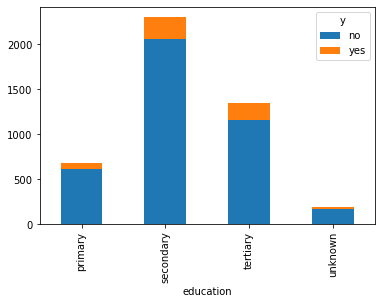

In [14]:
# data visualization

y = pd.crosstab(data.education,data.y)
y.plot.bar(stacked=True)

The above chart shows that majority of phone calls end with the customer being unsure of the product and a minoroty of customers eventually taking up the product

Text(0, 0.5, 'Count of responses')

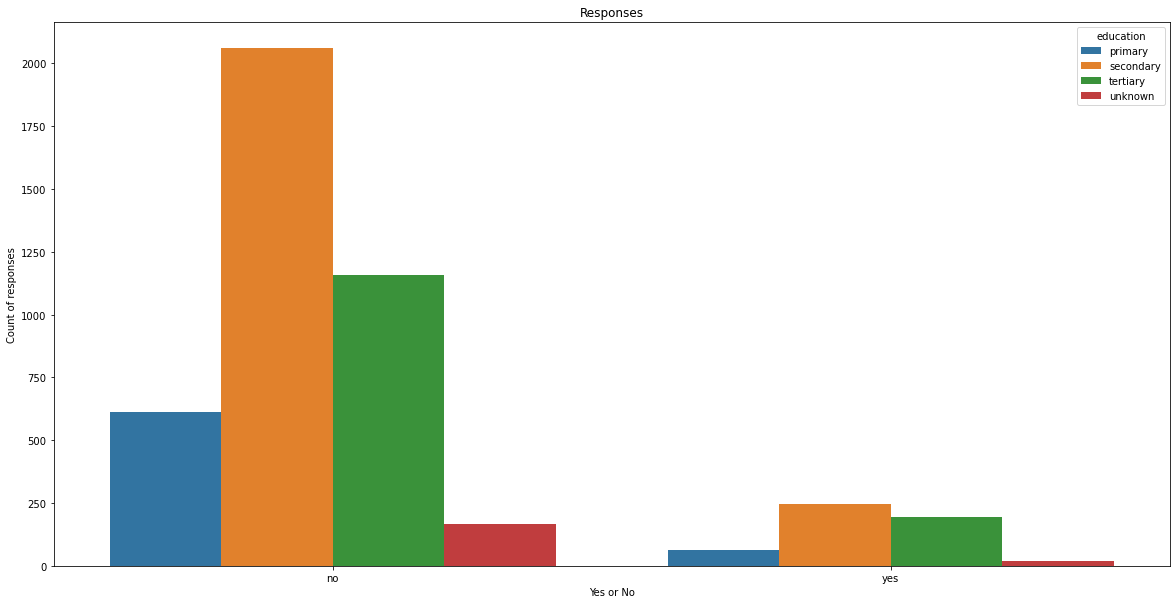

In [26]:
# Does education have a role to play in type of job

plt.figure(figsize=(20,10))
plt.title('Responses')
sns.countplot(x='y', data=data, hue='education')
plt.xlabel('Yes or No')
plt.ylabel('Count of responses')

From the chart above, majority of customers maintain secondary education as their highest level of education. Which is why majority of responses are from there

<AxesSubplot:xlabel='age', ylabel='balance'>

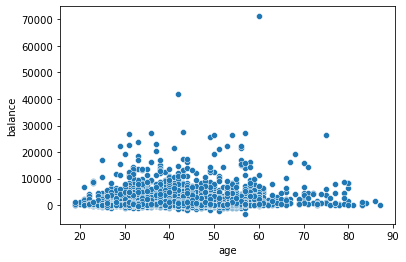

In [15]:
# Is there any relationship between age and balance

sns.scatterplot(x=data['age'], y=data ['balance'])

Majority of customers have a balance less than 10,000. A few have between 20,000 and 40,000 while only 1 customer has a high above 70,000

## Multivariate Analysis


<AxesSubplot:>

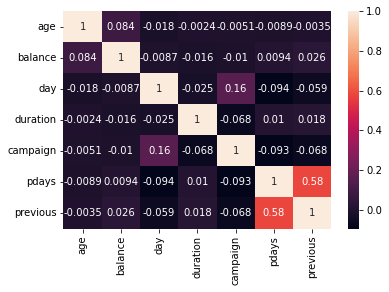

In [16]:
#multivariate analysis cells
corel = data.corr()
sns.heatmap(corel,annot=True)

The above chart shows there is a positive relationship between balance and the outcome, also between the duration of the call and outcome. Although these positives are weak. 

# Modelling

In this section is for training and evaluating models


## Select Target

In [17]:
#One-Hot Encoding

data.y.replace('yes',1, inplace = True)
data.y.replace('no', 0, inplace = True)

In [18]:
# print the data

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [19]:
# select categorical variables

categorical = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome' ]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
# use pd.get_dummies() for one hot encoding

categories_dumies = pd.get_dummies(data[categorical])
categories_dumies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
#use pd.concat() to merge the hot one coding to the original data

data = pd.concat([data,categories_dumies],axis=1)
print (data.shape)

(4521, 61)


In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [23]:
#remove the initial categorical columns now that we have encoded them

data = data.drop(categorical, axis=1)

In [24]:
#check the new shape

data.shape

(4521, 52)

## Select Features

In [25]:
#define bith y and x and select new values

y = data.y
X = data.drop('y', axis = 1)

In [26]:
# print the newly defined x

X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
# print the newly defined y

y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Train Test Split

In [28]:
#import the libraries we will need

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [29]:
#split into training and validation sets using a 40% split ratio

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [30]:
#initialize the models and create list of your model names

LR=LogisticRegression()
KN=KNeighborsClassifier()
DC=DecisionTreeClassifier()
RF=RandomForestClassifier()

models = [LR, KN, DC, RF]

## Import ML algorithms and initialize them

In [31]:
#define a function which would be sued to train the model

def trainer (model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    #print(classification_report(prediction,y_valid)) #use this later

In [32]:
#print the model

for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8872305140961857 


For KNeighborsClassifier, Accuracy score is 0.8756218905472637 


For DecisionTreeClassifier, Accuracy score is 0.8695411829740188 


For RandomForestClassifier, Accuracy score is 0.8949695964621338 



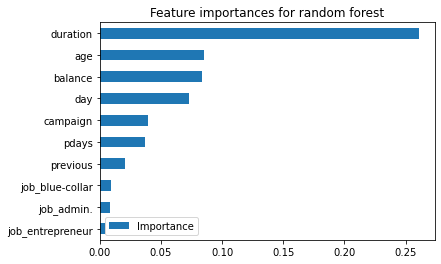

In [33]:
# get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

# plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [34]:
# get the top 10 importances

RF_importances[:10].sort_values(by='Importance').index.values

array(['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'pdays', 'campaign', 'day', 'balance', 'age', 'duration'],
      dtype=object)

## Train and Test the models

In [35]:
# Create a new train with the 10 most important features

X_train2 = X_train[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'pdays', 'campaign', 'day', 'age', 'balance', 'duration']]
X_train2.head(2)

,job_entrepreneur,job_admin.,job_blue-collar,previous,pdays,campaign,day,age,balance,duration
417,0,0,1,0,-1,2,29,45,999,182
3804,0,1,0,0,-1,2,18,40,1670,161


In [36]:
# create a function with the 10 most important features so we can predict on them. 

X_valid2 = X_valid[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'pdays', 'campaign', 'day', 'age', 'balance', 'duration']]
X_valid2.head(2)

,job_entrepreneur,job_admin.,job_blue-collar,previous,pdays,campaign,day,age,balance,duration
984,0,0,0,2,94,4,19,59,2013,222
1995,0,1,0,0,-1,2,20,38,-23,48


In [38]:
# Import neccsary libaries

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [37]:
# Train and predict to get the accuracy score 

RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.8805970149253731


In [39]:
# Train and predict to get the precision score 

p_positive = precision_score(pred2, y_valid, pos_label=1)
print(p_positive)

p_negative = precision_score(pred2, y_valid, pos_label=0)
print(p_negative)

0.23902439024390243
0.9625935162094763


In [40]:
# Train and predict to get the recall score 

r_positive = recall_score(pred2, y_valid, pos_label=1)
print(r_positive)

r_negative = recall_score(pred2, y_valid, pos_label=0)
print(r_negative)

0.44954128440366975
0.908235294117647


## Evaluating with Cross Validation

In [41]:
# evaluate the models using k-fold cross-validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# prepare the cross-validation procedure

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [42]:
# create a function which evaluates the accuracy of the model

def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [43]:
#train and predict, looping through the list of models

for model in models:
    trainer_with_cv(model,X_train2,y_train)

Accuracy: 0.886
Accuracy: 0.877
Accuracy: 0.853
Accuracy: 0.891


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In [44]:
# Generate the confusion matrix

confusion_matrix(pred2, y_valid)

array([[1544,  156],
       [  60,   49]], dtype=int64)

In [46]:
# Generate the classification report

print(classification_report(pred2, y_valid))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1700
           1       0.24      0.45      0.31       109

    accuracy                           0.88      1809
   macro avg       0.60      0.68      0.62      1809
weighted avg       0.92      0.88      0.90      1809



Random Forest Classifier(RF) was used to predict the dataset, This was used because:

- It had the highest prediction being 91% when compared to the other models.

- The second RF test which was conducted to test the accuracy of the RF model gave a 89% accuracy. 

- Further predictions and testing was conducted throuh precision and recall where it was deduced that out of 1809 tested data, 94 were negative, the negative values are the people who eventually took up the product while the positive value are those who did not take up the values. 

- According to precision, the model can has an accuracy of 97% for those people who did not take up the product and has a 23% accuracy for those who would take up the model. 

- According to recall, the model has an accuracy of 91% for those who would not take up the product and a 51% accuracy for those who would take up the product. 

- The cross validation evaluation also supports the stability of the model with a 89% accuracy which means it can further generalize new data. 

## Summary

What model should be deployed to production?
Any other comments?

Because Random Forest had the highest accuracy, it should be used to predict the customers who would eventually take up the product. The marketers have been blessed by the ability of the model to select which type of customers would not accept the product and can focus their attention fully on those who would take up the product. The cross validation evaluation conducted also further proves this point. 

